In [ ]:
#The code loads and inspects the dataset to understand its structure and contents.
#It performs data cleaning steps, such as handling missing values. Next, relevant features are derived from the existing data through feature extraction, based on domain knowledge.
#The processed dataset is then prepared for further analysis or modeling, ensuring that the data is clean, well-structured, and enriched with meaningful features for predictive tasks.

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 600)


# Load CSV file into a pandas DataFrame
data = pd.read_csv('/content/Median_Paragraphs_Features.csv')

# **1- Data Understanding**

In [ ]:
data.shape

(587, 70)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Paragraph_Code                           587 non-null    object 
 1   Book_Language                            587 non-null    object 
 2   Book_Topic                               587 non-null    object 
 3   Publication_Century                      587 non-null    int64  
 4   Authorship_Type                          587 non-null    object 
 5   Translation_Type                         587 non-null    object 
 6   Author_Count                             587 non-null    int64  
 7   Text_Source                              587 non-null    object 
 8   Listing_Count                            587 non-null    int64  
 9   Parenthesis_Count                        587 non-null    int64  
 10  Parenthetical_Expressions_Count          587 non-n

# **2- Data Cleaning**

# 2.1 Checking and Handling Missing Values(NaN)

In [ ]:
# Returns the number of missing data in each column; if too many, delete the column
data.isna().sum()

Paragraph_Code                               0
Book_Language                                0
Book_Topic                                   0
Publication_Century                          0
Authorship_Type                              0
Translation_Type                             0
Author_Count                                 0
Text_Source                                  0
Listing_Count                                0
Parenthesis_Count                            0
Parenthetical_Expressions_Count              0
Numerical_Content_Count                      0
Religious_Text_Count                         0
Poem_Verse_Count                             0
Character_Count                            587
Word_Count                                 587
Average_Word_Length_in_Characters          587
Syllable_Count                               0
Average_Syllables_per_Word                 587
Difficult_Words_Count                        0
Average_Number_of_Difficult_Words_Count    587
Unique_Loan_W

In [ ]:
#Create a boolean mask of the DataFrame, where each NaN element is marked as True
nan_mask = data.isna()

#Use the any() method to identify columns that contain at least one NaN value
cols_with_nan = nan_mask.any()

# Print the columns that contain NaN values
print(cols_with_nan[cols_with_nan == True].index.values)

['Character_Count' 'Word_Count' 'Average_Word_Length_in_Characters'
 'Average_Syllables_per_Word' 'Average_Number_of_Difficult_Words_Count'
 'Loan_Words_to_Token_Ratio' 'Foreign_Words_to_Token_Ratio'
 'Average_Sentence_Length_in_Words'
 'Average_Sentence_Length_in_Characters'
 'Average_Number_of_Fixations_per_Word' 'Average_Fixation_Duration'
 'Fixation_Rate' 'Average_Saccade_Duration' 'Saccade_to_Fixation_Ratio'
 'Average_Visit_Duration' 'Average_Number_of_Visits_per_Word']


# 2.2 Checking and Handling Duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.loc[data.duplicated()]

,Paragraph_Code,Book_Language,Book_Topic,Publication_Century,Authorship_Type,Translation_Type,Author_Count,Text_Source,Listing_Count,Parenthesis_Count,Parenthetical_Expressions_Count,Numerical_Content_Count,Religious_Text_Count,Poem_Verse_Count,Character_Count,Word_Count,Average_Word_Length_in_Characters,Syllable_Count,Average_Syllables_per_Word,Difficult_Words_Count,Average_Number_of_Difficult_Words_Count,Unique_Loan_Word_Count,Total_Loan_Word_Count,Unique_Foreign_Word_Count,Total_Foreign_Word_Count,Loan_Words_to_Token_Ratio,Foreign_Words_to_Token_Ratio,Sentence_Count,Average_Sentence_Length_in_Words,Average_Sentence_Length_in_Characters,OSMAN_Score,ARI_ArScore,Flesch_ArScore,Fog_ArScore,LIX_ArScore,Kincaid_Ar(Flesch)Score,Text_Style,Script_Style,Linguistic_Style,Writing_Technique,Time_to_First_Fixation,Fixations_Before,First_Fixation_Duration,Single_Fixation_Duration,Total_Fixation_Duration,Fixation_Count,Average_Number_of_Fixations_per_Word,Average_Fixation_Duration,Percentage_Fixated,Fixation_Rate,Total_Saccade_Count,Total_Saccade_Duration,Average_Saccade_Duration,Saccadic_Amplitude,Saccade_to_Fixation_Ratio,Absolute_Saccadic_Direction,Relative_Saccadic_Direction,Visit_Count,Single_Visit_Duration,Total_Visit_Duration,Average_Visit_Duration,Average_Number_of_Visits_per_Word,Pupil_Size,Rating_Total_Fixation_Duration,Rating_Fixation_Count,Rating_Percentage_Fixated,Rating_Visit_Count,Rating_Total_Visit_Duration,Total_Recording_Duration,Readability_Level


# 2.4 Handling Columns with Noise (Incorrect Negative Values)

In [ ]:
# Select float columns that contain negative values
float_cols = data.select_dtypes(include=['float'])

neg_cols = float_cols.loc[:, (float_cols < 0).any()]

print(neg_cols)

     OSMAN_Score  Fog_ArScore  Kincaid_Ar(Flesch)Score
0      74.269238  -157.817154                38.666829
1     150.816870   160.895000                -0.238889
2      89.780861   -92.475000                32.120000
3     135.702083   147.271087                 4.145652
4     164.333097   167.185882                -5.836471
5     166.823127   144.810970                -4.934909
6     150.690485   144.810970                -0.918077
7      42.424778  -190.949535                50.575349
8     146.671257   126.922658                 1.684054
9      99.565455    69.365217                20.725797
10     86.602979    73.185000                25.410000
11    120.056022    95.173000                12.406000
12    127.290625    88.490811                10.108468
13     88.608538    63.771250                24.238750
14    147.771349   115.742046                 1.214697
15    115.013104    65.530000                15.795319
16    111.864483    76.421132                15.766792
17    132.

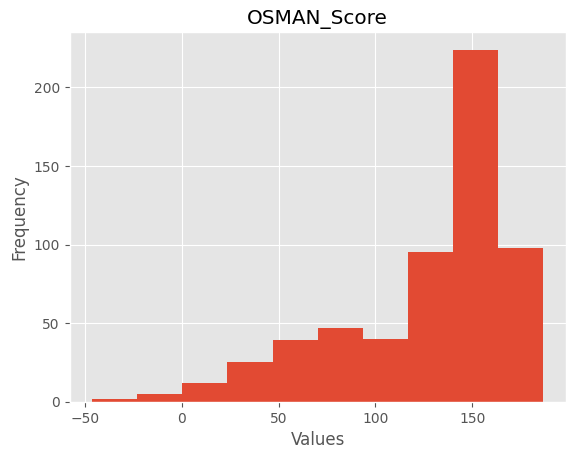

In [ ]:
#**************** (Paragraphs Only) ****************#

#1-Handling OSMAN_Score

# Show the distribution to decide between mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['OSMAN_Score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('OSMAN_Score')
plt.show()

In [ ]:
# Calculate the percentage of values that are less than 0
percent_neg_col = (data['OSMAN_Score'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

1.19%


In [ ]:
# Replace values less than 0 with `np.nan`
data.loc[data['OSMAN_Score'] < 0, 'OSMAN_Score'] = np.nan

# Print the updated DataFrame
data['OSMAN_Score'].isna().sum()

medians = data.groupby(['Readability_Level', 'Book_Language'])['OSMAN_Score'].median()

print('medians: ',medians)

# Replace missing values in each group with the corresponding mean value
data['OSMAN_Score'] = data.groupby(['Readability_Level', 'Book_Language'])['OSMAN_Score'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))

# Print the updated DataFrame
data['OSMAN_Score'].isna().sum()

medians:  Readability_Level  Book_Language
Difficult          Classical        121.569485
                   MSA              157.117117
Easy               Classical        134.478049
                   MSA              146.111372
Medium             Classical        150.567297
                   MSA              143.263400
Name: OSMAN_Score, dtype: float64


<ipython-input-139-316f28f03bec>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['OSMAN_Score'] = data.groupby(['Readability_Level', 'Book_Language'])['OSMAN_Score'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))


0

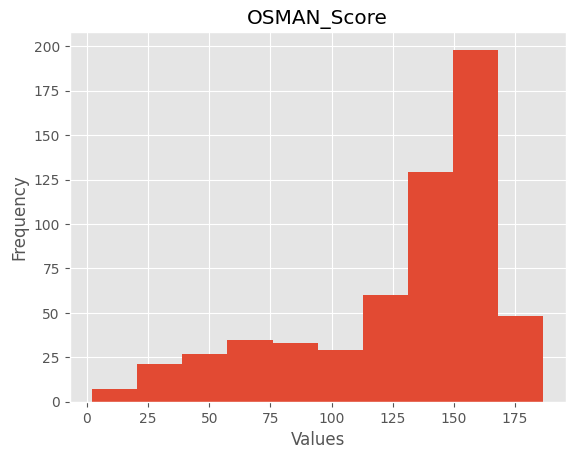

In [ ]:
# Display the distribution to decide between mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['OSMAN_Score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('OSMAN_Score')
plt.show()

In [ ]:
# Compute the percentage of values that are less than 0
percent_neg_col = (data['OSMAN_Score'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

0.00%


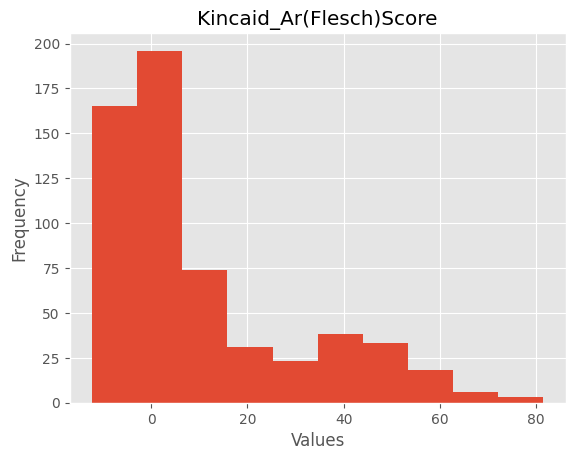

In [ ]:
#**************** (Paragraphs and Documents) ****************#

#2- Handling Kincaid_Ar(Flesch)Score

# Display the distribution to choose between mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['Kincaid_Ar(Flesch)Score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Kincaid_Ar(Flesch)Score')
plt.show()

In [ ]:
# Compute the percentage of values less than 0 in `'col1'`
percent_neg_col = (data['Kincaid_Ar(Flesch)Score'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

39.86%


In [ ]:
# Remove the column with excessive missing values (`Kincaid_Ar(Flesch)Score`)
data=data.drop(columns=['Kincaid_Ar(Flesch)Score'])


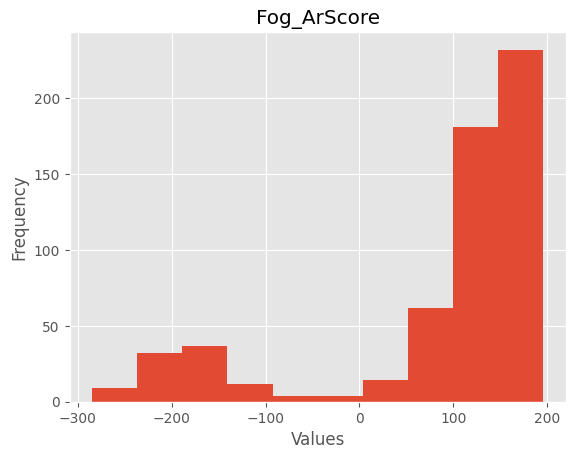

In [ ]:
#**************** (Paragraphs Only) ****************#

#3- Handling OSMAN_Fog_ArScore

# Display the distribution to choose between mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['Fog_ArScore'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Fog_ArScore')
plt.show()

In [ ]:

# Calculate the percentage of values that are less than 0
percent_neg_col = (data['Fog_ArScore'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

16.70%


In [ ]:
# Replace values less than 0 with `np.nan`
data.loc[data['Fog_ArScore'] < 0, 'Fog_ArScore'] = np.nan

# Print the updated DataFrame
data['Fog_ArScore'].isna().sum()

medians = data.groupby(['Readability_Level', 'Book_Language'])['Fog_ArScore'].median()

print('medians: ',medians)

# Replace missing values in each group with the corresponding mean value
data['Fog_ArScore'] = data.groupby(['Readability_Level', 'Book_Language'])['Fog_ArScore'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))

# Print the updated DataFrame
data['Fog_ArScore'].isna().sum()

medians:  Readability_Level  Book_Language
Difficult          Classical        101.548707
                   MSA              144.519126
Easy               Classical        141.803044
                   MSA              147.326955
Medium             Classical        140.002928
                   MSA              147.098718
Name: Fog_ArScore, dtype: float64


<ipython-input-147-9f1f66c1ae47>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Fog_ArScore'] = data.groupby(['Readability_Level', 'Book_Language'])['Fog_ArScore'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))


0

In [ ]:
# Calculate the percentage of values less than 0
percent_neg_col = (data['Fog_ArScore'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

0.00%


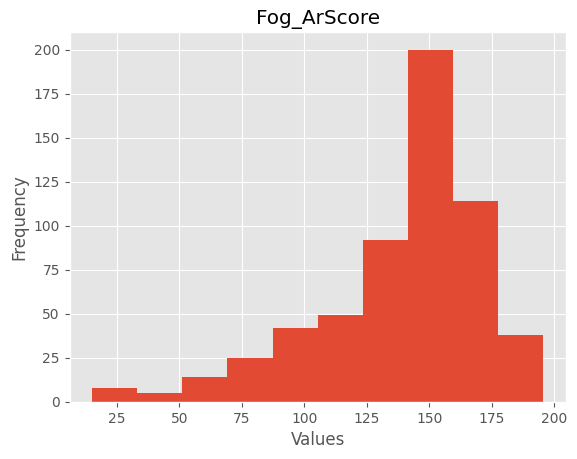

In [ ]:
# Display the distribution to decide whether to use mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['Fog_ArScore'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Fog_ArScore')
plt.show()

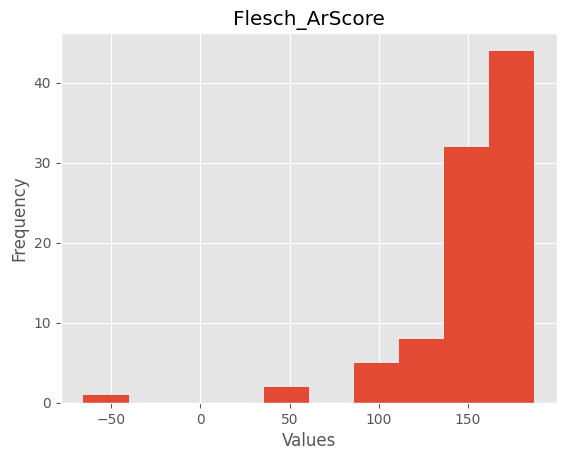

In [ ]:
#**************** (Documents Only) ****************#

#4- Handling Flesch_ArScore

# Display the distribution to choose between mean or median imputation
# Plot the column distribution using matplotlib
plt.hist(data['Flesch_ArScore'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Flesch_ArScore')
plt.show()

In [ ]:
# Calculate the percentage of values that are less than 0
percent_neg_col = (data['Flesch_ArScore'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

1.09%


In [ ]:
# Replace values less than 0 with `np.nan`
data.loc[data['Flesch_ArScore'] < 0, 'Flesch_ArScore'] = np.nan

# Print the updated DataFrame
data['Flesch_ArScore'].isna().sum()

medians = data.groupby(['Readability_Level', 'Book_Language'])['Flesch_ArScore'].median()

print('medians: ',medians)

# Impute missing values in each group with the corresponding mean value
data['Flesch_ArScore'] = data.groupby(['Readability_Level', 'Book_Language'])['Flesch_ArScore'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))

# Print the updated DataFrame
data['Flesch_ArScore'].isna().sum()

medians:  Readability_Level  Book_Language
Difficult          Classical        150.148581
Easy               Classical        146.687707
                   MSA              173.221371
Intermediate       Classical        156.805476
                   MSA              161.952615
Name: Flesch_ArScore, dtype: float64


<ipython-input-43-e81be30600a4>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Flesch_ArScore'] = data.groupby(['Readability_Level', 'Book_Language'])['Flesch_ArScore'].apply(lambda x: x.fillna(medians.loc[(x.name[0], x.name[1])]))


0

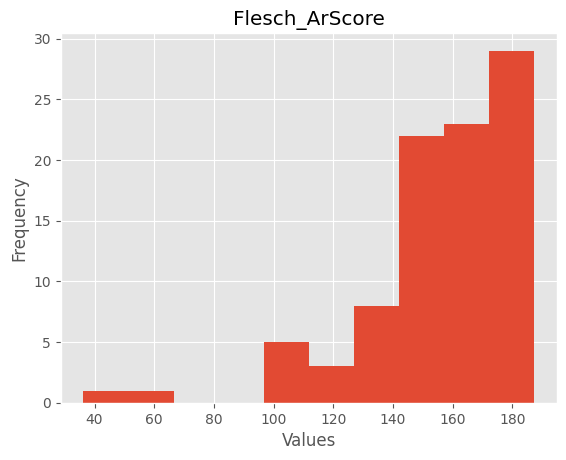

In [ ]:
# Display the distribution to choose between mean or median imputation
# Plot the distribution of a column using matplotlib
plt.hist(data['Flesch_ArScore'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Flesch_ArScore')
plt.show()

In [ ]:
# Calculate the percentage of values that are less than 0
percent_neg_col = (data['Flesch_ArScore'] < 0).mean() * 100
print(f"{percent_neg_col:.2f}%")

0.00%


In [ ]:
# Print the updated DataFrame
data.isna().sum()

Paragraph_Code                               0
Book_Language                                0
Book_Topic                                   0
Publication_Century                          0
Authorship_Type                              0
Translation_Type                             0
Author_Count                                 0
Text_Source                                  0
Listing_Count                                0
Parenthesis_Count                            0
Parenthetical_Expressions_Count              0
Numerical_Content_Count                      0
Religious_Text_Count                         0
Poem_Verse_Count                             0
Character_Count                            587
Word_Count                                 587
Average_Word_Length_in_Characters          587
Syllable_Count                               0
Average_Syllables_per_Word                 587
Difficult_Words_Count                        0
Average_Number_of_Difficult_Words_Count    587
Unique_Loan_W

# **3- Feature Extraction**

In [ ]:
!pip install pyarabic

In [ ]:
import pandas as pd
import pyarabic.araby as araby
import string
from sklearn.feature_extraction.text import CountVectorizer
from pyarabic.araby import strip_tashkeel
import re


# Define punctuation marks for Arabic and English
extra_punctuations = '''`÷×؛<>_()*&^%][ـ،؛/:"؟.,;'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = extra_punctuations + english_punctuations

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 200)

# Load the data
fullText = pd.read_csv('/content/MSA_and_Classical_Full_Paragraphs.csv')

fullText.shape

(587, 2)

# Using Full Text:

# **Character Count (Including Diacritics and All Punctuation)**

In [ ]:
def process_text(text):

    # Check if the text is a string and handle non-string values (e.g., NaN)
    if isinstance(text, str):
        text = re.sub(r'[ \n]+', ' ', text)
        text = re.sub(r' +', ' ', text)
        text=text.strip()
        char_count = len(text)
    else:
        char_count = 0
    return char_count

def new_text(text):
    # Check if the text is a string and handle non-string values (e.g., NaN)
    if isinstance(text, str):
        text = re.sub(r'[ \n]+', ' ', text)
        text = re.sub(r' +', ' ', text)
        text=text.strip()
    return text

#`fullText` is the DataFrame and `Paragraph_Text` is the column of interest
# Apply the function to each row in the DataFrame
fullText['All_Visual_Symbol_Count'] = fullText['Text'].apply(process_text)
fullText['Text_All_Visual_Symbol']=fullText['Text'].apply(new_text)


# Print the sum of the `Character Count` column
total_char_count = fullText['All_Visual_Symbol_Count'].sum()
print("All_Visual_Symbol_Count Without Removal:", total_char_count)



All_Visual_Symbol_Count Without Removal: 345422


# **Character Count (Excluding Diacritics, Punctuation, and Spaces)**

In [ ]:
import re


# Function to remove punctuation from text
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def process_text(text):
    text = re.sub(r'\s+', '', text)  # Remove whitespaces
    text = strip_tashkeel(text)  # strip_tashkeel is a function to remove tashkeel
    text = remove_punctuations(text)  # Remove punctuations
    char_count = len(text)
    return char_count

def new_text(text):
    text = re.sub(r'\s+', '', text)  # Remove whitespaces
    text = strip_tashkeel(text)  #  strip_tashkeel is a function to remove tashkeel
    text = remove_punctuations(text)  # Remove punctuations
    return text

# Apply the function to each row in the DataFrame
fullText['Char_Count'] = fullText['Text'].apply(process_text)
data['Character_Count']= fullText['Text'].apply(process_text)
fullText['New_Text_Char_Count'] = fullText['Text'].apply(new_text)

# Print the sum of the `Character Count` column
total_char_count = fullText['Char_Count'].sum()
print("Char_Count With Removal:", total_char_count)


Char_Count With Removal: 261900


# **Total Word Count**

In [ ]:
import re

# Define a function to clean text and count the number of words
def count_words(text):
    text = strip_tashkeel(text)  # Strip tashkeel
    text = re.sub(r'[ \n]+', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = text.strip()

    # Split the text into words and count them
    words = text.split()
    return len(words)  # Return the number of words

# Apply the function to the `Paragraph_Text` column
fullText['Word_Count'] = fullText['Text'].apply(count_words)
data['Word_Count']=fullText['Text'].apply(count_words)


# Print the sum of the `Word Count` column
total_word_count = fullText['Word_Count'].sum()
print("Total Word Count:", total_word_count)


Total Word Count: 57616


# **Unique Word Count (All Texts), Excluding Punctuation and Diacritics**

In [ ]:
# Custom tokenizer function that removes punctuation
def tok(text):
    text = re.sub(r'[ \n]+', ' ', text)
    text = re.sub(r' +', ' ', text)
    text=text.strip()
    # Remove diacritics and newlines
    text = strip_tashkeel(text)
    # Remove punctuations
    text = remove_punctuations(text)
    # Tokenize the text
    tokens = text.split()
    return tokens


# Function to remove punctuation from text
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
# Concatenate all text into a single string
all_text = ' '.join(fullText['Text'].astype(str))

# Tokenize the concatenated text and identify unique words
unique_words = set(tok(all_text))

# Count the number of unique words
unique_word_count_All_texts= len(unique_words)
print("Total Unique Word Count Across All Paragraphs:", unique_word_count_All_texts)

# Optionally, save the set of unique words to a file
with open('unique_words.txt', 'w', encoding='utf-8') as f:
    for word in unique_words:
        f.write("%s\n" % word)


Total Unique Word Count Across All Paragraphs: 19409


# **Unique Word Count (Each Paragraph), Excluding Punctuation and Diacritics**

In [ ]:
# Create a `CountVectorizer` object using the custom tokenizer
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=tok)

# Ensure the `Text` column is of type string
fullText['Text'] = fullText['Text'].astype(str)

# Fit the vectorizer to all documents
vectorizer.fit(fullText['Text'])

# Tokenize the text and compute the unique word count
fullText['Tokenized_Text_Per_Paragraph'] = fullText['Text'].apply(tok)
fullText['Unique_Word_Count_Per_Paragraph'] = fullText['Tokenized_Text_Per_Paragraph'].apply(lambda tokens: len(set(tokens)))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Save the DataFrame to an Excel file
fullText.to_excel('FullText_Calculated_Features_Paragraphs.xlsx', index=False)

In [ ]:
data.shape

(587, 69)

# Using Data:

**Text-based Features**

In [ ]:
data['Average_Word_Length_in_Characters'] = data['Character_Count'] / data['Word_Count']
data['Average_Syllables_per_Word'] = data['Syllable_Count']/ data['Word_Count']
data['Average_Number_of_Difficult_Words_Count'] = data['Difficult_Words_Count'] / data['Word_Count']
data['Foreign_Words_to_Token_Ratio'] = data['Total_Foreign_Word_Count'] / data['Word_Count']
data['Loan_Words_to_Token_Ratio'] = data['Total_Loan_Word_Count'] / data['Word_Count']
data['Average_Sentence_Length_in_Words'] = data['Word_Count'] / data['Sentence_Count']
data['Average_Sentence_Length_in_Characters'] = data['Character_Count'] / data['Sentence_Count']

In [ ]:
# Print the updated DataFrame
data.isna().sum()

Paragraph_Code                               0
Book_Language                                0
Book_Topic                                   0
Publication_Century                          0
Authorship_Type                              0
Translation_Type                             0
Author_Count                                 0
Text_Source                                  0
Listing_Count                                0
Parenthesis_Count                            0
Parenthetical_Expressions_Count              0
Numerical_Content_Count                      0
Religious_Text_Count                         0
Poem_Verse_Count                             0
Character_Count                              0
Word_Count                                   0
Average_Word_Length_in_Characters            0
Syllable_Count                               0
Average_Syllables_per_Word                   0
Difficult_Words_Count                        0
Average_Number_of_Difficult_Words_Count      0
Unique_Loan_W

**Gaze-based Features**

In [ ]:
data['Average_Fixation_Duration'] = data['Total_Fixation_Duration'] / data['Fixation_Count']
data['Average_Number_of_Fixations_per_Word'] = data['Fixation_Count'] / data['Word_Count']
data['Fixation_Rate'] = data['Fixation_Count'] / data['Total_Fixation_Duration']
data['Average_Saccade_Duration'] = data['Total_Saccade_Duration'] / data['Total_Saccade_Count']
data['Saccade_to_Fixation_Ratio'] = data['Total_Saccade_Duration'] / data['Total_Fixation_Duration']
data['Average_Visit_Duration'] = data['Total_Visit_Duration'] / data['Visit_Count']
data['Average_Number_of_Visits_per_Word'] = data['Visit_Count'] / data['Word_Count']


In [ ]:
# Print the updated DataFrame
data.isna().sum()

Paragraph_Code                             0
Book_Language                              0
Book_Topic                                 0
Publication_Century                        0
Authorship_Type                            0
Translation_Type                           0
Author_Count                               0
Text_Source                                0
Listing_Count                              0
Parenthesis_Count                          0
Parenthetical_Expressions_Count            0
Numerical_Content_Count                    0
Religious_Text_Count                       0
Poem_Verse_Count                           0
Character_Count                            0
Word_Count                                 0
Average_Word_Length_in_Characters          0
Syllable_Count                             0
Average_Syllables_per_Word                 0
Difficult_Words_Count                      0
Average_Number_of_Difficult_Words_Count    0
Unique_Loan_Word_Count                     0
Total_Loan

# **4- Save to an Excel File**

In [ ]:
df = pd.DataFrame(data)

# Save the dataframe to an Excel file
df.to_excel('Final_Clean_Claculated_Features_Paragraphs.xlsx', index=False)